In [ ]:
import pandas as pd

df1 = pd.read_csv('../Data/Data_1.csv')
print(df1.head())

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


In [2]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [3]:
df1.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [4]:
print(df1.describe())

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


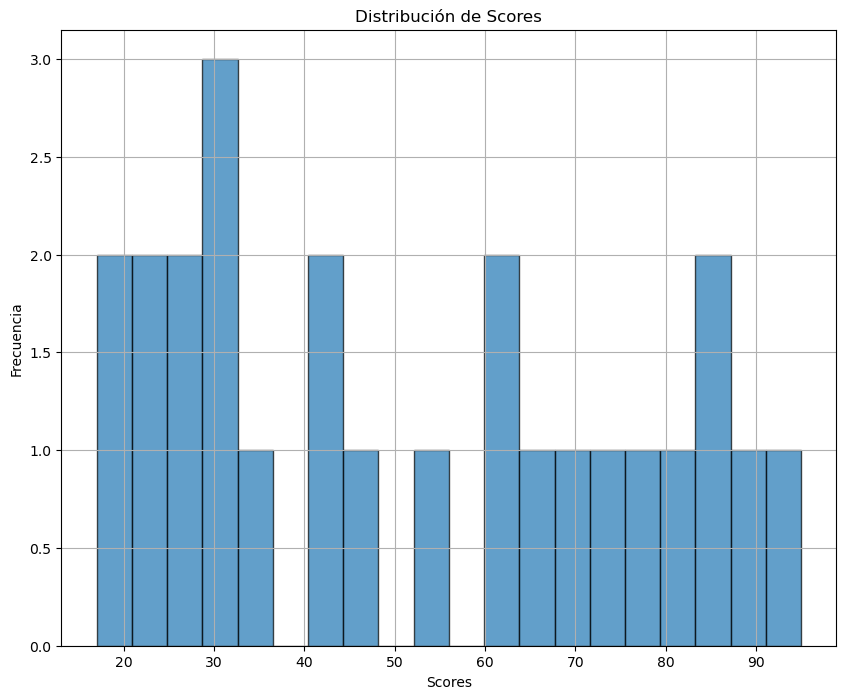

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.hist(df1['Scores'], bins = 20, edgecolor = 'black', alpha = 0.7)
plt.title('Distribución de Scores')
plt.xlabel('Scores')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [6]:
import plotly.express as px

fig = px.box(df1, y = 'Hours', title='Distribución de Hours')
fig.show()

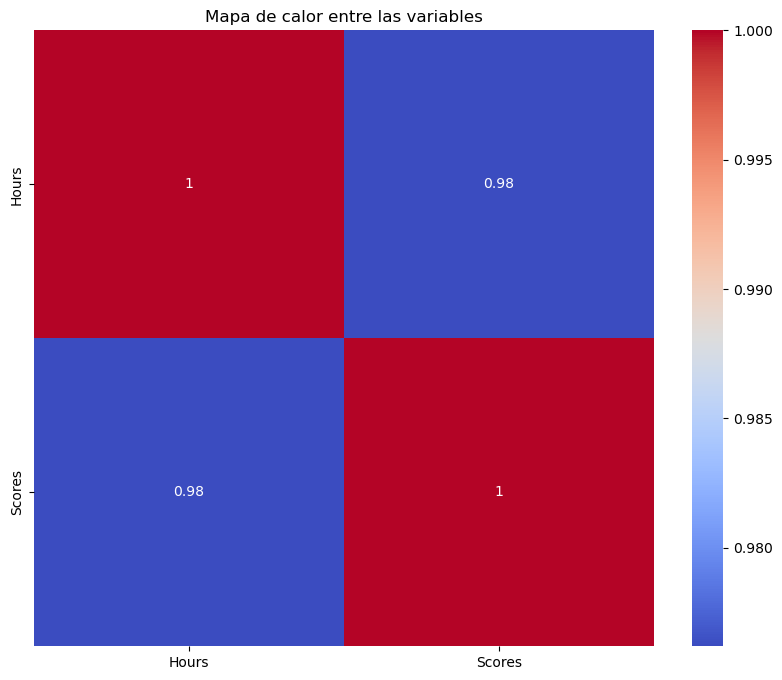

In [7]:
import seaborn as sns

plt.figure(figsize=(10, 8))
correlation_matrix = df1.corr()
sns.heatmap(correlation_matrix, annot= True, cmap='coolwarm')
plt.title('Mapa de calor entre las variables')
plt.show()

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

df1 = pd.read_csv('../Data/student_scores.csv')

#Selecciono la variable objetivo y la separo
X = df1.drop('Scores', axis = 1) 
y = df1['Scores'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Ahora hago el pipeline, utilizo pipeline porque lo utilicé en otros proyectos y la verdad que me gusta mucho su funcionamiento.

num_columns = X.select_dtypes(include=['float64', 'int64']).columns
cat_columns = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps =[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore') )
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_columns),
        ('cat', categorical_transformer, cat_columns)
    ]
)

#Ahora hago el pipeline completo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Creo los modelos
pipeline_LR = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocesamiento definido previamente
    ('regressor', LinearRegression())
])

pipeline_KNN = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors=5))
])

pipeline_DT = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(criterion='squared_error', max_depth=None, random_state=42))
])

pipeline_RF = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=None, random_state=42))
])

pipeline_XGB = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(eval_metric='rmse', random_state=42))
])

# Entreno los modelos
pipeline_LR.fit(X_train, y_train)
pipeline_KNN.fit(X_train, y_train)
pipeline_DT.fit(X_train, y_train)
pipeline_RF.fit(X_train, y_train)
pipeline_XGB.fit(X_train, y_train)

# Hago las predicciones
y_pred_LR = pipeline_LR.predict(X_test)
y_pred_KNN = pipeline_KNN.predict(X_test)
y_pred_DT = pipeline_DT.predict(X_test)
y_pred_RF = pipeline_RF.predict(X_test)
y_pred_XGB = pipeline_XGB.predict(X_test)

# Evalúo los modelos
mse_LR = mean_squared_error(y_test, y_pred_LR)
mse_KNN = mean_squared_error(y_test, y_pred_KNN)
mse_DT = mean_squared_error(y_test, y_pred_DT)
mse_RF = mean_squared_error(y_test, y_pred_RF)
mse_XGB = mean_squared_error(y_test, y_pred_XGB)

r2_LR = r2_score(y_test, y_pred_LR)
r2_KNN = r2_score(y_test, y_pred_KNN)
r2_DT = r2_score(y_test, y_pred_DT)
r2_RF = r2_score(y_test, y_pred_RF)
r2_XGB = r2_score(y_test, y_pred_XGB)

# Puedo hacer un diccionario para mostrar los resultados
results = {
    'Model': ["Linear Regression", "KNN Regressor", "Decision Tree Regressor", "Random Forest Regressor", "XGBoost Regressor"],
    "Mean Squared Error": [mse_LR, mse_KNN, mse_DT, mse_RF, mse_XGB],
    "R2 Score": [r2_LR, r2_KNN, r2_DT, r2_RF, r2_XGB]
}

results_df = pd.DataFrame(results)
print(results_df)

                     Model  Mean Squared Error  R2 Score
0        Linear Regression           18.943212  0.967806
1            KNN Regressor           34.232000  0.941822
2  Decision Tree Regressor           31.700000  0.946125
3  Random Forest Regressor           18.688034  0.968239
4        XGBoost Regressor           31.005458  0.947305


In [10]:
from sklearn.model_selection import cross_val_score
# Validación cruzada 
scores_LR = cross_val_score(pipeline_LR, X_train, y_train, cv=5, scoring='r2')
print("Linear Regression - Mean R2:", scores_LR.mean())
print("Linear Regression - Std R2:", scores_LR.std())

scores_KNN = cross_val_score(pipeline_KNN, X_train, y_train, cv=5, scoring='r2')
print("K-Nearest Neighbors Regressor - Mean R2:", scores_KNN.mean())
print("K-Nearest Neighbors Regressor - Std R2:", scores_KNN.std())

scores_DT = cross_val_score(pipeline_DT, X_train, y_train, cv=5, scoring='r2')
print("Decision Tree Regressor - Mean R2:", scores_DT.mean())
print("Decision Tree Regressor - Std R2:", scores_DT.std())

scores_RF = cross_val_score(pipeline_RF, X_train, y_train, cv=5, scoring='r2')
print("Random Forest Regressor - Mean R2:", scores_RF.mean())
print("Random Forest Regressor - Std R2:", scores_RF.std())

scores_XGB = cross_val_score(pipeline_XGB, X_train, y_train, cv=5, scoring='r2')
print("XGBoost Regressor - Mean R2:", scores_XGB.mean())
print("XGBoost Regressor - Std R2:", scores_XGB.std())

Linear Regression - Mean R2: 0.7953635134250877
Linear Regression - Std R2: 0.1717480436262196
K-Nearest Neighbors Regressor - Mean R2: 0.626023450659545
K-Nearest Neighbors Regressor - Std R2: 0.38892901725714635
Decision Tree Regressor - Mean R2: 0.3899000053524668
Decision Tree Regressor - Std R2: 0.5157721187827109
Random Forest Regressor - Mean R2: 0.5145055737799322
Random Forest Regressor - Std R2: 0.4535204882637179
XGBoost Regressor - Mean R2: 0.42121861949163775
XGBoost Regressor - Std R2: 0.5347325785242893
